# The Julia Set

The <a href="https://en.wikipedia.org/wiki/Julia_set" target="_blank">Julia set</a> is a fractal closely related to the <a href="https://en.wikipedia.org/wiki/Mandelbrot_set" target="_blank">Mandelbrot set</a>, and is generated by iterating the relation: <i>z</i><sub>n+1</sub> = <i>z</i><sub>n</sub> + <i>c</i>, where <i>z</i><sub>n</sub> is the complex grid and <i>c</i> is a complex number.

In the Mandelbrot set, <i>c</i><sub>n</sub> = <i>x</i> + <i>y</i>i where <i>x</i> spans the real number space and <i>y</i>i spans the imaginary number space, and i = √-1. In contrast, for the Julia set <i>c</i> can take on a much wider range of values, giving rise to a much larger set of dynamics than in the Mandelbrot set.

After several iterations of <i>z</i><sub>n+1</sub> = <i>z</i><sub>n</sub> + <i>c</i>, certain points on the complex grid <i>z</i><sub>n+1</sub> grow to infinity, while other points remain bounded even after many iterations.

For example for the case of _c_ = 0, we find that within 10 iterations the point _z_ = 1 + i quickly grows to the astronomical value of 1.34e+154.

In [1]:
z = 1 + 1j

for i in range(10):
    z = z**2
    print("Iteration: {:2d}, z: {}.".format(i+1, abs(z)))

Iteration:  1, z: 2.0.
Iteration:  2, z: 4.0.
Iteration:  3, z: 16.0.
Iteration:  4, z: 256.0.
Iteration:  5, z: 65536.0.
Iteration:  6, z: 4294967296.0.
Iteration:  7, z: 1.8446744073709552e+19.
Iteration:  8, z: 3.402823669209385e+38.
Iteration:  9, z: 1.157920892373162e+77.
Iteration: 10, z: 1.3407807929942597e+154.


On the other hand, the point _z_ = 0.5 + 0.5i decreases to the infinitesimal value of 7.46e-155. Therefore, the point _z_ = 0.5 + 0.5i remains bounded.

In [2]:
z = 0.5 + 0.5j

for i in range(10):
    z = z**2
    print("Iteration: {:2d}, z: {}.".format(i+1, abs(z)))

Iteration:  1, z: 0.5.
Iteration:  2, z: 0.25.
Iteration:  3, z: 0.0625.
Iteration:  4, z: 0.00390625.
Iteration:  5, z: 1.52587890625e-05.
Iteration:  6, z: 2.3283064365386963e-10.
Iteration:  7, z: 5.421010862427522e-20.
Iteration:  8, z: 2.938735877055719e-39.
Iteration:  9, z: 8.636168555094445e-78.
Iteration: 10, z: 7.458340731200207e-155.


In the same way, the set of points on the complex grid which remain bounded under the iteration <i>z</i><sub>n+1</sub> = <i>z</i><sub>n</sub> + <i>c</i> for a specified value of <i>c</i> forms the Julia set.

The Python code below demonstrates how to perform the calculations above for a specified range in the complex grid, and track which grid points remain bounded and which grow to infinity during the iterations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def julia_set(c = -0.835 - 0.2321 * 1j, num_iter = 50, N = 1000, X0 = np.array([-2, 2, -2, 2])):
    """
    Generates the Julia set fractal
    
    Inputs
    ------
    num_iter: int
        number of iterations to run
    N: int
        number of grid points on each axis to use. We use a square grid
    X0: np.array
        bounding box of the square grid to use
    
    Returns
    -------
    x: np.array
        x axis vlaues
    y: np.array
        y axis values
    F: np.array
        2D np.array containing the fractal
    """
    x0 = X0[0]
    x1 = X0[1]
    y0 = X0[2]
    y1 = X0[3]
    
    # Set up the complex grid z = x + yi
    x, y = np.meshgrid(np.linspace(x0, x1, N), np.linspace(y0, y1, N) * 1j)
    z = x + y
    
    # F keeps track of which grid points are bounded
    # even after many iterations of z_n+1 = z_n**2 + c.
    F = np.zeros([N, N])
    
    for j in range(num_iter):
        index = np.abs(z) < np.inf
        F[index] = F[index] + 1
        z = z ** 2 + c

    return np.linspace(x0,x1,N), np.linspace(y0,y1,N), F

Running the code with 100 iterations for `c = 0.285 + 0.01j` results in the following image below. The light areas correspond to points on the complex grid which grew to infinity after 100 iterations, while the dark areas correspond to the set of points which remain bounded for this particular value of _c_.

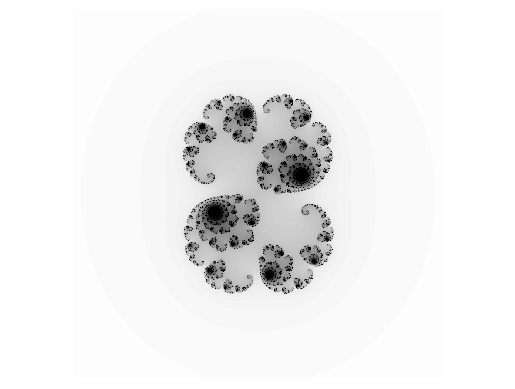

In [4]:
x, y, F = julia_set(c = 0.285 + 0.01j, num_iter = 100)
plt.pcolormesh(x, y, F, cmap = "binary")
plt.axis('equal')
plt.axis('off')
plt.show()

By using a different value of _c_, we obtain a different fractal. For example, `c = -0.835 - 0.2321j` leads to the following fractal which is markedly different from the one above.

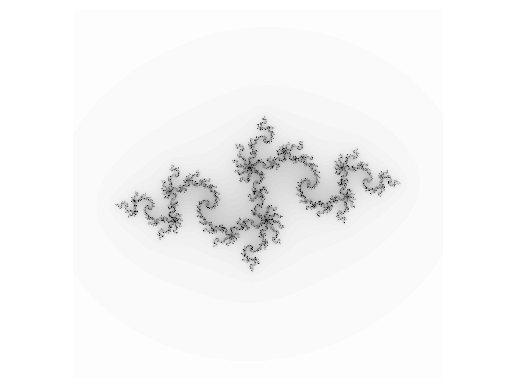

In [5]:
x, y, F = julia_set(c = -0.835 - 0.2321j, num_iter = 100)
plt.pcolormesh(x, y, F, cmap = "binary")
plt.axis('equal')
plt.axis('off')
plt.show()